In [ ]:
import time
from pathlib import Path
from operator import itemgetter

import scanpy as sc
import numpy as np
import pandas as pd
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score
from scipy.sparse import csr_matrix
from joblib import Parallel, delayed
import os
import torch

import stLVG_upload
from stLVG_upload.model import Cal_Spatial_Net, load_anndatas, run_SLAT_mlp_AGF, spatial_match, run_SLAT, compute_lisi_for_adata, run_SLAT_AGF_contrast
from stLVG_upload.viz import match_3D_multi, hist, Sankey, build_3D
from stLVG_upload.metrics import region_statistics

In [2]:
adata_1=sc.read_h5ad('D:\ppppaper\data\BARISTAseq\Slice_2.h5ad')
adata_1.var_names_make_unique(join="++")
adata_1

AnnData object with n_obs × n_vars = 2042 × 79
    obs: 'Slice', 'x', 'y', 'Dist to pia', 'Dist to bottom', 'Angle', 'unused-1', 'unused-2', 'x_um', 'y_um', 'depth_um', 'layer', 'Region', 'ground_truth'
    uns: 'layer_colors'
    obsm: 'spatial'

In [3]:
adata_2=sc.read_h5ad('D:\ppppaper\data\BARISTAseq\Slice_3.h5ad')
adata_2.var_names_make_unique(join="++")
adata_2

AnnData object with n_obs × n_vars = 1690 × 79
    obs: 'Slice', 'x', 'y', 'Dist to pia', 'Dist to bottom', 'Angle', 'unused-1', 'unused-2', 'x_um', 'y_um', 'depth_um', 'layer', 'Region', 'ground_truth'
    uns: 'layer_colors'
    obsm: 'spatial'

In [4]:
x1_coords=adata_1.obsm['spatial'][:,0]
y1_coords=adata_1.obsm['spatial'][:,1]
x2_coords=adata_2.obsm['spatial'][:,0]
y2_coords=adata_2.obsm['spatial'][:,1]
locations_1 = np.array([x1_coords, y1_coords])
locations_2 = np.array([x2_coords, y2_coords])

locations_1_tensor = torch.tensor(locations_1)
locations_2_tensor = torch.tensor(locations_2)
locations_1_tensor = locations_1_tensor.transpose(0, 1)
locations_1_tensor = locations_1_tensor.to(dtype=torch.float32)
locations_2_tensor = locations_2_tensor.transpose(0, 1)
locations_2_tensor = locations_2_tensor.to(dtype=torch.float32)
location = [locations_1_tensor, locations_2_tensor]

In [5]:
Cal_Spatial_Net(adata_1, k_cutoff=10, model='KNN')
Cal_Spatial_Net(adata_2, k_cutoff=10, model='KNN')

Calculating spatial neighbor graph ...
The graph contains 22764 edges, 2042 cells.
11.147894221351615 neighbors per cell on average.
Calculating spatial neighbor graph ...
The graph contains 18824 edges, 1690 cells.
11.138461538461538 neighbors per cell on average.


In [6]:
edges, features = load_anndatas([adata_1, adata_2], feature='DPCA')

Use DPCA feature to format graph


d:\Anaconda\envs\scSLAT\lib\site-packages\anndata\_core\anndata.py:1763: FutureWarning: The AnnData.concatenate method is deprecated in favour of the anndata.concat function. Please use anndata.concat instead.

See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  warnings.warn(
d:\Anaconda\envs\scSLAT\lib\site-packages\scanpy\preprocessing\_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
d:\Anaconda\envs\scSLAT\lib\site-packages\scanpy\preprocessing\_normalization.py:196: UserWarning: Some cells have zero counts
  warn(UserWarning('Some cells have zero counts'))
d:\Anaconda\envs\scSLAT\lib\site-packages\scanpy\preprocessing\_simple.py:843: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
d:\Anaconda\envs\scSLAT\lib\site-packages\scanpy\preprocessing\_simple.py:843: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [7]:
embd0_0, embd0_1, embd1_0, embd1_1, embd0, embd1, time = run_SLAT_AGF_contrast(features, edges, location, limit_loss=0.001)

GPU is not available
Running
---------- epochs: 1 ----------
---- Ran row_normalize in 0.01 s ----

---- Ran row_normalize in 0.01 s ----

---------- epochs: 2 ----------
---- Ran row_normalize in 0.01 s ----

---- Ran row_normalize in 0.01 s ----

---------- epochs: 3 ----------
---- Ran row_normalize in 0.01 s ----

---- Ran row_normalize in 0.01 s ----

---------- epochs: 4 ----------
---- Ran row_normalize in 0.01 s ----

---- Ran row_normalize in 0.01 s ----

---------- epochs: 5 ----------
---- Ran row_normalize in 0.01 s ----

---- Ran row_normalize in 0.01 s ----

---------- epochs: 6 ----------
---- Ran row_normalize in 0.01 s ----

---- Ran row_normalize in 0.01 s ----

---- Ran row_normalize in 0.01 s ----

---- Ran row_normalize in 0.01 s ----

---------- epochs: 1 ----------
---- Ran row_normalize in 0.01 s ----

---- Ran row_normalize in 0.01 s ----



D:\ppppaper\SLAT\SLAT-main\SLAT-main\scSLAT\model\graphconv\AGF_Com.py:109: UserWarning: Casting complex values to real discards the imaginary part (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\native\Copy.cpp:301.)
  complex_array_tensor = torch.tensor(complex_array, dtype=torch.float32)


---------- epochs: 2 ----------
---- Ran row_normalize in 0.01 s ----

---- Ran row_normalize in 0.01 s ----

---------- epochs: 3 ----------
---- Ran row_normalize in 0.01 s ----

---- Ran row_normalize in 0.01 s ----

---------- epochs: 4 ----------
---- Ran row_normalize in 0.01 s ----

---- Ran row_normalize in 0.01 s ----

---------- epochs: 5 ----------
---- Ran row_normalize in 0.01 s ----

---- Ran row_normalize in 0.01 s ----

---------- epochs: 6 ----------
---- Ran row_normalize in 0.01 s ----

---- Ran row_normalize in 0.01 s ----

---- Ran row_normalize in 0.01 s ----

---- Ran row_normalize in 0.01 s ----

---------- Combined epochs: 0 ----------
Contrastive Loss 0: 5.22820520401001
Contrastive Loss 1: 5.045403957366943
Total Combined Loss: 10.273609161376953
---------- Combined epochs: 1 ----------
Contrastive Loss 0: 4.6212897300720215
Contrastive Loss 1: 4.476737976074219
Total Combined Loss: 9.098028182983398
---------- Combined epochs: 2 ----------
Contrastive Loss 0

In [ ]:
adata_1.obsm['stLVG'] = embd0.detach().cpu().numpy()
adata_2.obsm['stLVG'] = embd1.detach().cpu().numpy()
adata_com = sc.concat([adata_1, adata_2], label='slice_name', keys=['slice_1', 'slice_2'])

sc.pp.neighbors(adata_com, use_rep= 'stLVG')
sc.tl.umap(adata_com)

d:\Anaconda\envs\scSLAT\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


d:\Anaconda\envs\scSLAT\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
d:\Anaconda\envs\scSLAT\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


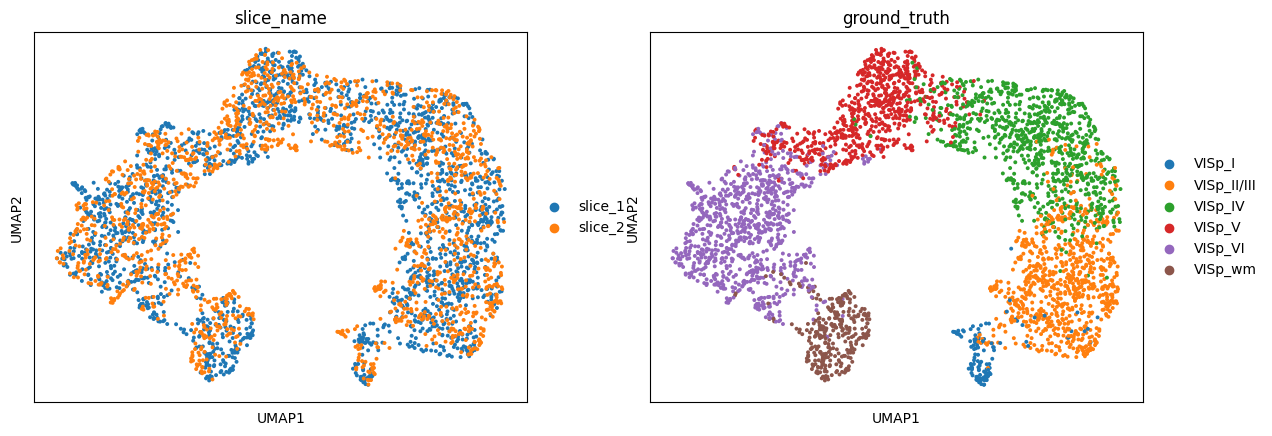

In [9]:
sc.pl.umap(adata_com, color= ['slice_name', 'ground_truth'])

In [ ]:
# LISI
lisi_scores = compute_lisi_for_adata(adata_com, obsm_key='stLVG', obs_key_list=['ground_truth', 'slice_name'])
print("LISI Scores:\n", lisi_scores)

LISI Scores:
 {'cLISI': 1.2004483970032915, 'iLISI': 1.698756451356814}


In [ ]:
true_labels_1 = adata_1.obs['ground_truth'].to_numpy()
true_labels_2 = adata_2.obs['ground_truth'].to_numpy()

best, index, distance = spatial_match([embd0, embd1], adatas=[adata_1, adata_2], reorder=False)
valid_indices = best < true_labels_1.size
valid_best = best[valid_indices]
valid_indices = np.arange(len(best))[valid_indices] 

aligned_true_labels_1 = true_labels_1[valid_best]
matched_labels_3 = true_labels_2[valid_indices]

# compute ARI and NMI
ari = adjusted_rand_score(aligned_true_labels_1, matched_labels_3)
nmi = normalized_mutual_info_score(aligned_true_labels_1, matched_labels_3)

print(f'ARI: {ari}, NMI: {nmi}')

ARI: 0.7635732069485528, NMI: 0.7706354991290092


In [12]:
embd2, embd3, time = run_SLAT(features, edges)

GPU is not available
Running
---------- epochs: 1 ----------
---------- epochs: 2 ----------
---------- epochs: 3 ----------
---------- epochs: 4 ----------
---------- epochs: 5 ----------
---------- epochs: 6 ----------
Training model time: 13.13


In [13]:
adata_1.obsm['scSLAT'] = embd2.detach().cpu().numpy()
adata_2.obsm['scSLAT'] = embd3.detach().cpu().numpy()
adata_com_2 = sc.concat([adata_1,adata_2], label= 'slice_name', keys= ['slice_1','slice_2'])

sc.pp.neighbors(adata_com_2, use_rep= 'scSLAT')
sc.tl.umap(adata_com_2)

d:\Anaconda\envs\scSLAT\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
d:\Anaconda\envs\scSLAT\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


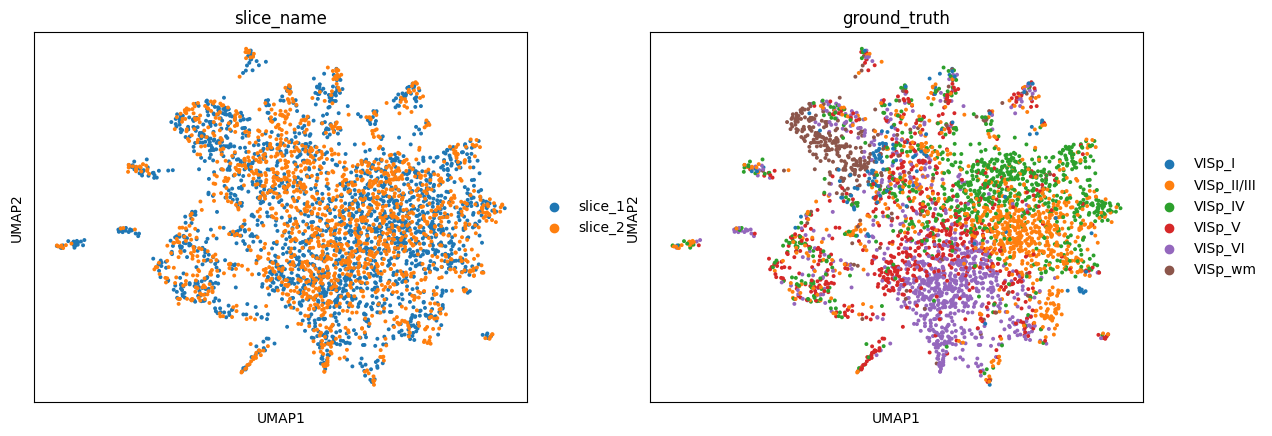

In [14]:
sc.pl.umap(adata_com_2, color= ['slice_name', 'ground_truth'])

In [ ]:
true_labels_1 = adata_1.obs['ground_truth'].to_numpy()
true_labels_2 = adata_2.obs['ground_truth'].to_numpy()

best_2, index_2, distance_2 = spatial_match([embd2, embd3], adatas=[adata_1, adata_2], reorder=False)
valid_indices = best_2 < true_labels_1.size
valid_best = best_2[valid_indices]
valid_indices = np.arange(len(best_2))[valid_indices] 

aligned_true_labels_1 = true_labels_1[valid_best]
matched_labels_3 = true_labels_2[valid_indices]

# compute ARI and NMI
ari = adjusted_rand_score(aligned_true_labels_1, matched_labels_3)
nmi = normalized_mutual_info_score(aligned_true_labels_1, matched_labels_3)

print(f'ARI: {ari}, NMI: {nmi}')

ARI: 0.6481924897484297, NMI: 0.6791675044457186


In [16]:
lisi_scores_2 = compute_lisi_for_adata(adata_com_2, obsm_key='scSLAT', obs_key_list=['ground_truth', 'slice_name'])
print("LISI Scores:\n", lisi_scores_2)

LISI Scores:
 {'cLISI': 2.3331930701407972, 'iLISI': 1.7811193825881912}


In [17]:
adata1_df = pd.DataFrame({'index': range(embd0.shape[0]),
                        'x': adata_1.obsm['spatial'][:,0],
                        'y': adata_1.obsm['spatial'][:,1],
                        'celltype': adata_1.obs['ground_truth']})
adata2_df = pd.DataFrame({'index': range(embd1.shape[0]),
                        'x': adata_2.obsm['spatial'][:,0],
                        'y': adata_2.obsm['spatial'][:,1],
                        'celltype': adata_2.obs['ground_truth']})

matching = np.array([range(index.shape[0]), best])
best_match = distance[:,0]

In [18]:
adata3_df = pd.DataFrame({'index': range(embd2.shape[0]),
                        'x': adata_1.obsm['spatial'][:,0],
                        'y': adata_1.obsm['spatial'][:,1],
                        'celltype': adata_1.obs['ground_truth']})
adata4_df = pd.DataFrame({'index': range(embd3.shape[0]),
                        'x': adata_2.obsm['spatial'][:,0],
                        'y': adata_2.obsm['spatial'][:,1],
                        'celltype': adata_2.obs['ground_truth']})

matching_2 = np.array([range(index.shape[0]), best_2])
best_match_2 = distance_2[:,0]

In [19]:
adata2_df['target_celltype'] = adata1_df.iloc[matching[1,:],:]['celltype'].to_list()
matching_table = adata2_df.groupby(['celltype','target_celltype']).size().unstack(fill_value=0)

In [20]:
adata4_df['target_celltype'] = adata3_df.iloc[matching_2[1,:],:]['celltype'].to_list()
matching_table_2 = adata4_df.groupby(['celltype','target_celltype']).size().unstack(fill_value=0)

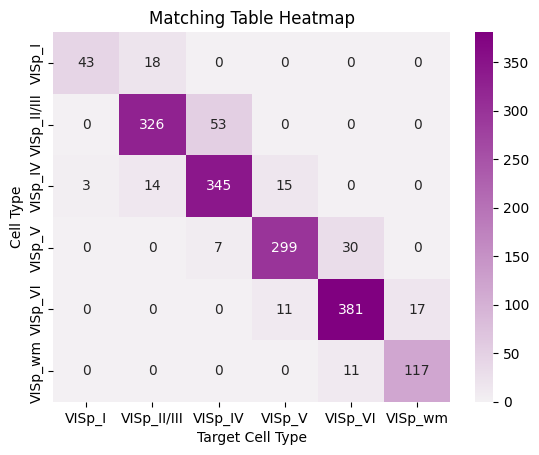

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

custom_cmap = sns.color_palette("light:purple", as_cmap=True)

sns.heatmap(matching_table, annot = True, fmt = "d", cmap = custom_cmap)
plt.title('Matching Table Heatmap')
plt.xlabel('Target Cell Type')
plt.ylabel('Cell Type')
plt.show()

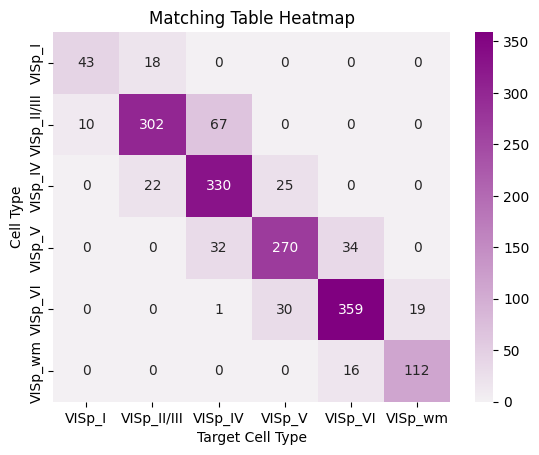

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

custom_cmap = sns.color_palette("light:purple", as_cmap=True)

sns.heatmap(matching_table_2, annot = True, fmt = "d", cmap = custom_cmap)
plt.title('Matching Table Heatmap')
plt.xlabel('Target Cell Type')
plt.ylabel('Cell Type')
plt.show()

In [23]:
correct_matches = 0
total_matches = 0

for i, row in matching_table.iterrows():
    if i in matching_table.columns and row[i] > 0:
        correct_matches += row[i]
    total_matches += row.sum()


accuracy = correct_matches / total_matches if total_matches > 0 else 0
correct_matches,total_matches,accuracy

(1511, 1690, 0.8940828402366864)

In [24]:
correct_matches = 0
total_matches = 0

for i, row in matching_table_2.iterrows():
    if i in matching_table_2.columns and row[i] > 0:
        correct_matches += row[i]
    total_matches += row.sum()


accuracy = correct_matches / total_matches if total_matches > 0 else 0
correct_matches,total_matches,accuracy

(1416, 1690, 0.8378698224852071)

In [25]:
first_indices = matching[0]
second_indices = matching[1]
second_array_labels = adata1_df.iloc[second_indices]['celltype'].values

max_index = first_indices.max()
new_labels = np.empty(max_index + 1, dtype=object)

# transfer
new_labels[first_indices] = second_array_labels

adata_2.obs['transferred_labels'] = new_labels

[<AxesSubplot: xlabel='spatial1', ylabel='spatial2'>]

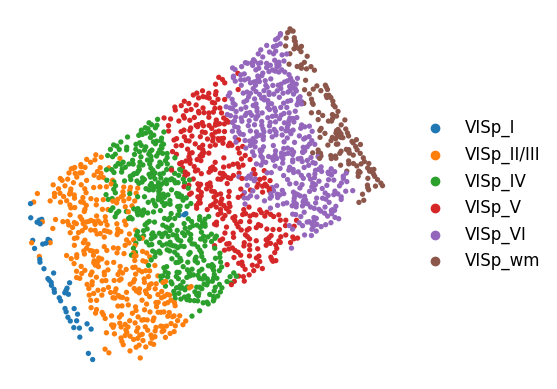

In [34]:
spot_size = 20
pathology_color = [
    "#1F77B4", "#FF7F0E", "#2CA02C", "#D62728", "#9467BD", "#8C564B",
    "#E377C2", "#7F7F7F", "#BCBD22", "#17BECF", "#AEC7E8", "#FFBB78",
    "#98DF8A", "#FF9896", "#C5B0D5", "#C49C94", "#F7B6D2", "#C7C7C7",
    "#DBDB8D", "#9EDAE5", "#1F9B99", "#FFCD56", "#33A02C", "#FB9A99",
    "#A6CEE3"
]
sc.pl.spatial(adata_2, img_key=None, color=['transferred_labels'], title=[''],
                legend_fontsize=12, show=False, frameon=False, palette=pathology_color,
                spot_size=spot_size)

[<AxesSubplot: xlabel='spatial1', ylabel='spatial2'>]

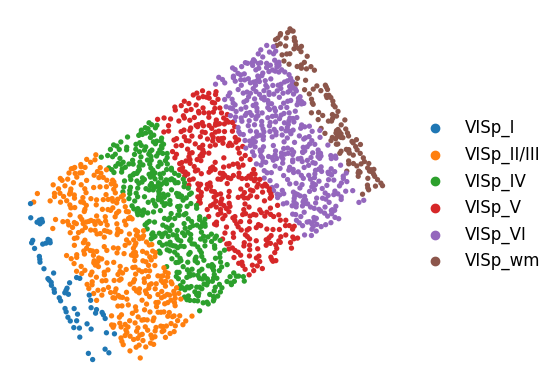

In [35]:
spot_size = 20
pathology_color = [
    "#1F77B4", "#FF7F0E", "#2CA02C", "#D62728", "#9467BD", "#8C564B",
    "#E377C2", "#7F7F7F", "#BCBD22", "#17BECF", "#AEC7E8", "#FFBB78",
    "#98DF8A", "#FF9896", "#C5B0D5", "#C49C94", "#F7B6D2", "#C7C7C7",
    "#DBDB8D", "#9EDAE5", "#1F9B99", "#FFCD56", "#33A02C", "#FB9A99",
    "#A6CEE3"
]
sc.pl.spatial(adata_2, img_key=None, color=['ground_truth'], title=[''],
                legend_fontsize=12, show=False, frameon=False, palette=pathology_color,
                spot_size=spot_size)

In [30]:
first_indices = matching_2[0]
second_indices = matching_2[1]
second_array_labels = adata3_df.iloc[second_indices]['celltype'].values

max_index = first_indices.max()
new_labels = np.empty(max_index + 1, dtype=object)

# transfer
new_labels[first_indices] = second_array_labels

adata_2.obs['transferred_labels_SLAT'] = new_labels

[<AxesSubplot: xlabel='spatial1', ylabel='spatial2'>]

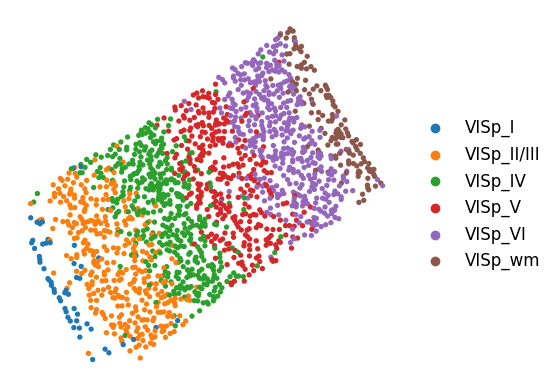

In [36]:
spot_size = 20
sc.pl.spatial(adata_2, img_key=None, color=['transferred_labels_SLAT'], title=[''],
                legend_fontsize=12, show=False, frameon=False, palette=pathology_color,
                spot_size=spot_size)

In [ ]:
# adata_1.write('D:\ppppaper\data\Result\BARISTA_Slice_2.h5ad')

In [ ]:
# adata_2.write('D:\ppppaper\data\Result\BARISTA_Slice_3.h5ad')